In [ ]:
# !pip install pandas-datareader
# import pandas_datareader as pdr

In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
# from sklearn import  sklearn

In [17]:
start = dt.datetime(2010, 1, 29)
end = dt.datetime.today()
df = web.DataReader('^SPX', 'stooq')

df.tail()

array([[3.93235010e+03, 3.97007007e+03, 3.92854004e+03, 3.96961011e+03,
        4.30336000e+09],
       [3.97757007e+03, 3.99776001e+03, 3.93756006e+03, 3.98316992e+03,
        4.44026000e+09],
       [3.96060010e+03, 4.00394995e+03, 3.94766992e+03, 3.99909009e+03,
        3.93970000e+09],
       ...,
       [4.74193018e+03, 4.76547022e+03, 4.73035010e+03, 4.75650000e+03,
        3.52996000e+09],
       [4.75993994e+03, 4.79079980e+03, 4.75620020e+03, 4.78345020e+03,
        3.49868000e+09],
       [4.79212988e+03, 4.79850000e+03, 4.73958008e+03, 4.77602978e+03,
        1.34066446e+09]])

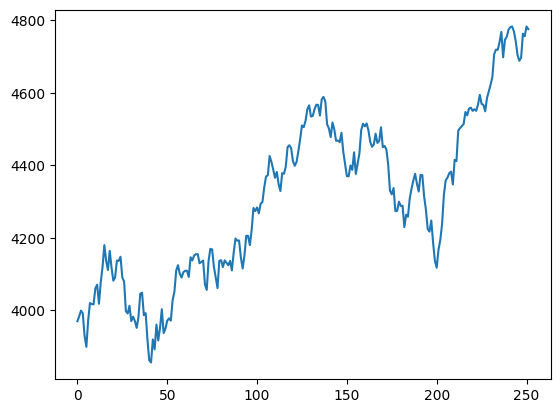

In [18]:
testprices = np.array(df["Close"])[-1:0:-1]
plt.plot(testprices)

In [6]:
def k_days_back(vals, k):
    vals1 = vals[0:-k]
    vals2 = vals[k:]
    ds = 100 * (vals2-vals1) / vals1
    return ds

def ks_days_back(vals, ks):
    m = max(ks)
    ds_1 = k_days_back(vals, 1)
    y = ds_1[m:]
    n = y.shape[0]
    ds_0 = np.array([0]*n).reshape(-1,1)

    for k in ks:
        ds_k = k_days_back(testprices, k)
        ds_k = ds_k[(m-k):-1].reshape(-1,1)
        ds_0 = np.concatenate((ds_0, ds_k), axis=1)

    return n, ds_0, y

n, X, y = ks_days_back(testprices, [1,2,3,4,5,6,7,20])

In [7]:
split_i = math.ceil(0.8*n)
X_train = X[0:split_i]
y_train = y[0:split_i]
X_test = X[split_i:]
y_test = y[split_i:]
X_train

array([[ 0.        ,  1.28902502,  1.36084317, ...,  0.72884211,
         1.41140131,  6.27737057],
       [ 0.        ,  0.30239769,  1.59532069, ...,  0.55995909,
         1.0334438 ,  5.46795388],
       [ 0.        , -0.26516238,  0.03643346, ...,  0.51691127,
         0.2933119 ,  4.95508581],
       ...,
       [ 0.        ,  0.69782559,  0.62052641, ...,  2.07709337,
         1.81774254, -0.38455869],
       [ 0.        ,  1.28493972,  1.99173195, ...,  3.80399253,
         3.38872249, -0.52498897],
       [ 0.        ,  0.34159527,  1.63092428, ...,  3.37921136,
         4.15858206, -0.9075417 ]])

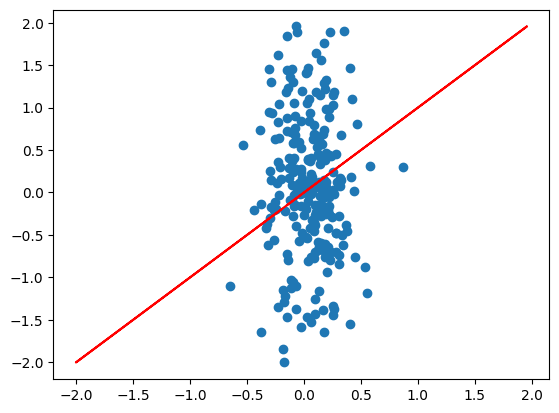

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color = 'red')
plt.show()

In [9]:
A = reg.coef_
b = reg.intercept_
A,b

(array([ 0.        , -0.25868655,  0.10647356,  0.062951  , -0.08721049,
         0.13504725, -0.25135415,  0.1418345 , -0.00347575]),
 0.05493889850757394)

In [10]:
tp = np.dot((1 * (y_pred>0.06)), (1 * (y_test>0.06)))
tn = np.dot((1 * (y_pred<0.06)), (1 * (y_test<0.06)))
n_test = y_test.shape[0]
print(tp, tn, ((tp+tn)/n_test))
reg.score(X_test, y_test)

58 56 0.46153846153846156


-0.08246286588502527

In [11]:
1.0006 ** 250

testprices[split_i]/testprices[0]

1.5470086462919295

In [12]:
import statsmodels.api as sm
ols = sm.OLS(y_train, X_train)
ols_result = ols.fit()
ols_result.summary()

C:\Users\miraj\Desktop\projects\financial-markets\venv\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              13.70
Date:                Thu, 11 Jan 2024   Prob (F-statistic):                    5.79e-19
Time:                        14:31:07   Log-Likelihood:                         -1716.3
No. Observations:                 988   AIC:                                      3449.
Df Residuals:                     980   BIC:                                      3488.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1            -0.2587      0.041     -6.363      0.000      -0.339      -0.179
x2             0.1065      0.042      2.560      0.011       0.025       0.188
x3             0.0630      0.042      1.518      0.129      -0.018       0.145
x4            -0.0873      0.042     -2.090      0.037      -0.169      -0.005
x5             0.1352      0.042      3.228      0.001       0.053       0.217
x6            -0.2516      0.041     -6.065      0.000      -0.333      -0.170
x7             0.1419      0.033      4.299      0.000       0.077       0.207
x8            -0.0019      0.009     -0.204      0.838      -0.021       0.017
==============================================================================
Omnibus:                      223.181   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2329.955
Skew:                          -0.715   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
x = [3, 6, 4, 2, 8, 1, 7, 2, 9]
x[0:-3]

# 36 64 42 28 81 17 72 29 d1[0]
# 64 42 28 81 17 72 29 d1[1]
# 32 68 41 27 82 19 d3[0]
# 28 81 17 72 29 d1[3]

[3, 6, 4, 2, 8, 1]